# Twitter Sentiment Analysis

Database link: https://raw.githubusercontent.com/swilliamc/NLP_Twitter_Sentiment_Analysis/main/twitter.csv



**Importing Libraries**

In [1]:
import re
import tweepy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob

%matplotlib inline

In [2]:
# Loading the dataset

tdf = pd.read_csv('/content/twitter.csv')
tdf

id  label                                              tweet
0          1      0   @user when a father is dysfunctional and is s...
1          2      0  @user @user thanks for #lyft credit i can't us...
2          3      0                                bihday your majesty
3          4      0  #model   i love u take with u all the time in ...
4          5      0             factsguide: society now    #motivation
...      ...    ...                                                ...
31957  31958      0  ate @user isz that youuu?ðððððð...
31958  31959      0    to see nina turner on the airwaves trying to...
31959  31960      0  listening to sad songs on a monday morning otw...
31960  31961      1  @user #sikh #temple vandalised in in #calgary,...
31961  31962      0                   thank you @user for you follow  

[31962 rows x 3 columns]

**Getting basic information about dataset.**

Information like shape, values, count, etc

In [3]:
tdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [4]:
tdf.describe()

id         label
count  31962.000000  31962.000000
mean   15981.500000      0.070146
std     9226.778988      0.255397
min        1.000000      0.000000
25%     7991.250000      0.000000
50%    15981.500000      0.000000
75%    23971.750000      0.000000
max    31962.000000      1.000000

In [5]:
tdf.shape

(31962, 3)

In [6]:
tdf.label.value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [7]:
# Dropping the id column

tdf.drop(['id'], axis=1, inplace=True)
tdf.head()

label                                              tweet
0      0   @user when a father is dysfunctional and is s...
1      0  @user @user thanks for #lyft credit i can't us...
2      0                                bihday your majesty
3      0  #model   i love u take with u all the time in ...
4      0             factsguide: society now    #motivation

In [8]:
tdf.isnull().sum()

label    0
tweet    0
dtype: int64

In [9]:
tdf.label.unique()

array([0, 1])

## Visualization of labels

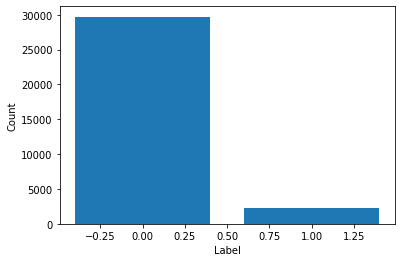

In [10]:
plt.bar(tdf.label.unique(), tdf.label.value_counts())
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


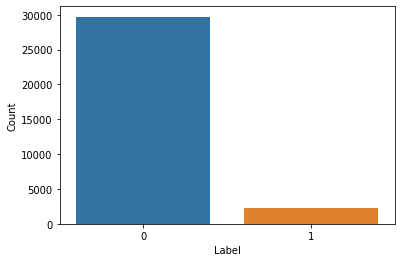

In [11]:
# Visualization using seaborn library

import seaborn as sns
sns.countplot(tdf.label)

plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [12]:
tdf.head(3)

label                                              tweet
0      0   @user when a father is dysfunctional and is s...
1      0  @user @user thanks for #lyft credit i can't us...
2      0                                bihday your majesty

In [13]:
# Adding additional column 'length' for getting tweet length and getting information out of it

tdf['length'] = tdf.tweet.apply(len)
tdf.head(10)

label                                              tweet  length
0      0   @user when a father is dysfunctional and is s...     102
1      0  @user @user thanks for #lyft credit i can't us...     122
2      0                                bihday your majesty      21
3      0  #model   i love u take with u all the time in ...      86
4      0             factsguide: society now    #motivation      39
5      0  [2/2] huge fan fare and big talking before the...     116
6      0   @user camping tomorrow @user @user @user @use...      74
7      0  the next school year is the year for exams.ð...     143
8      0  we won!!! love the land!!! #allin #cavs #champ...      87
9      0   @user @user welcome here !  i'm   it's so #gr...      50

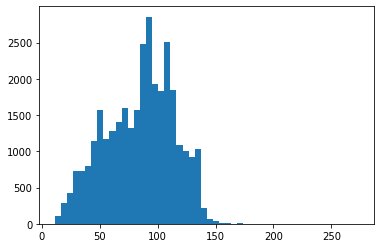

In [14]:
# Plotting histogram of tweet length

plt.hist(tdf.length, bins=50);

**Getting basic tweet length details**

In [15]:
tdf.length.min(), tdf.length.max()

(11, 274)

In [16]:
tdf[tdf.length > 250].shape[0], tdf[tdf.length < 30].shape[0]

(1, 1158)

In [17]:
tdf[tdf.length == tdf.length.min()].tweet

25195    i love you 
Name: tweet, dtype: object

In [18]:
print(tdf[tdf.length == round(tdf.length.mean())].shape[0])

tdf[tdf.length == round(tdf.length.mean())].iloc[0].tweet

387


' â\x86\x9d #under the spell of brexit referendum - commerzbank   #blog #silver #gold #forex'

In [19]:
# Dividing dataset to positive and negative label based tweet

positive_tweet = tdf[tdf.label == 1]
negative_tweet = tdf[tdf.label == 0]

positive_tweet.shape, negative_tweet.shape

((2242, 3), (29720, 3))

In [20]:
# def cleanData(text):
#   text = re.sub(r'@[A-Za-z0-9]+', '', text)
#   text = re.sub(r'#', '', text)
#   text = re.sub(r'RT[\s]+', '', text)
#   text = re.sub(r'https?\/\/\S+', '', text)

#   return text

# tdf['tweet'] = tdf['tweet'].apply(cleanData)
# tdf.head()

In [21]:
string = ' '.join(tdf.tweet.tolist())
string

' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run @user @user thanks for #lyft credit i can\'t use cause they don\'t offer wheelchair vans in pdx.    #disapointed #getthanked   bihday your majesty #model   i love u take with u all the time in urð\x9f\x93±!!! ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91\x85ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦    factsguide: society now    #motivation [2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo    @user camping tomorrow @user @user @user @user @user @user @user dannyâ\x80¦ the next school year is the year for exams.ð\x9f\x98¯ can\'t think about that ð\x9f\x98\xad #school #exams   #hate #imagine #actorslife #revolutionschool #girl we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers  â\x80¦   @user @user welcome here !  i\'m   it\'s so #gr8 !   â\x86\x9d #ireland consumer price index (mom) climbed from pre

## Plotting the word cloud for positive, negative and overall tweet

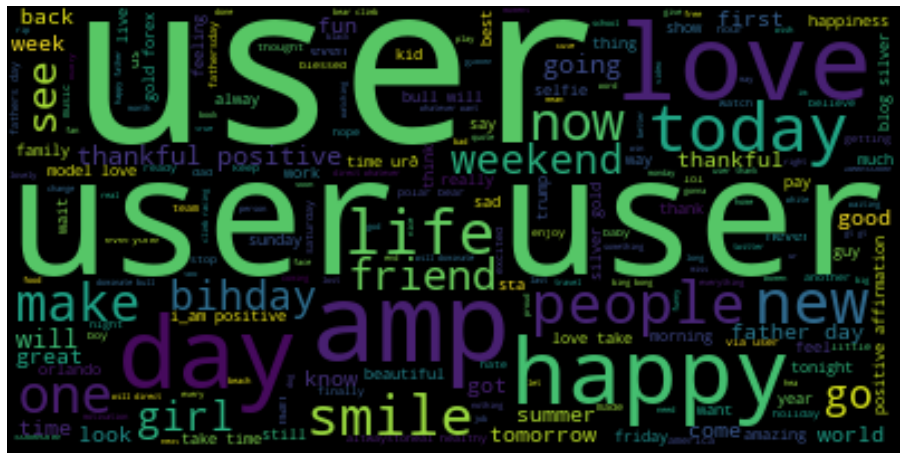

In [22]:
plt.figure(figsize=(16, 12))

wordcloud = WordCloud(max_font_size=100, random_state=42).generate(string)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

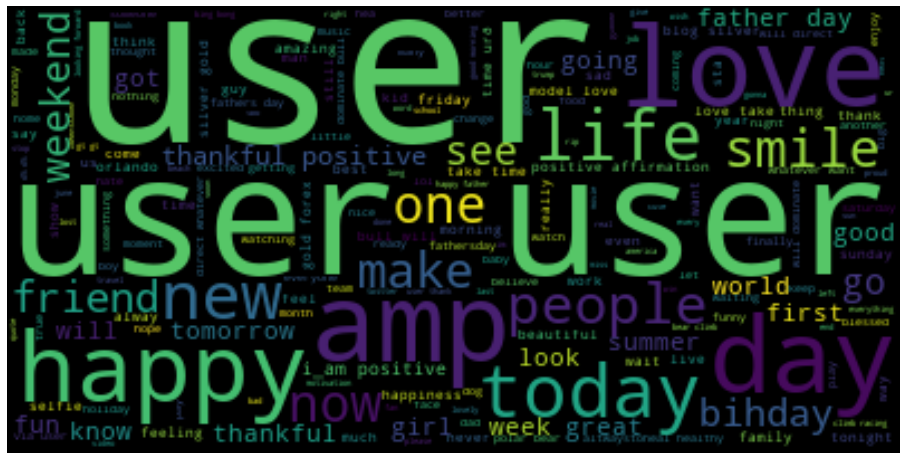

In [23]:
neg_string = ' '.join(negative_tweet.tweet.tolist())

plt.figure(figsize=(16, 12))

wordcloud = WordCloud(max_font_size=100, random_state=42).generate(neg_string)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

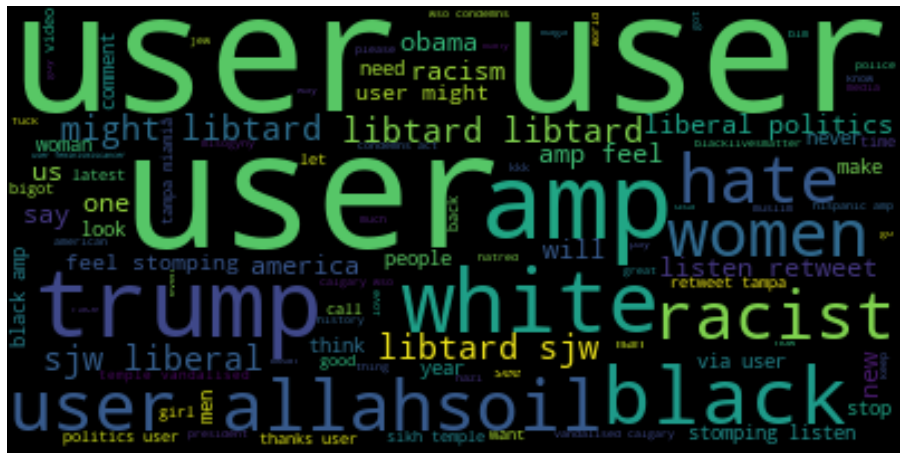

In [24]:
pos_string = ' '.join(positive_tweet.tweet.tolist())

plt.figure(figsize=(16, 12))

wordcloud = WordCloud(max_font_size=100, random_state=42).generate(pos_string)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**Checking on string library**

In [25]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [26]:
tdf.iloc[:8].tweet

0     @user when a father is dysfunctional and is s...
1    @user @user thanks for #lyft credit i can't us...
2                                  bihday your majesty
3    #model   i love u take with u all the time in ...
4               factsguide: society now    #motivation
5    [2/2] huge fan fare and big talking before the...
6     @user camping tomorrow @user @user @user @use...
7    the next school year is the year for exams.ð...
Name: tweet, dtype: object

In [27]:
# tdf['tweet'] = tdf.tweet.apply(lambda x: ''.join([i for i in x if i not in string.punctuation]))
# tdf.iloc[:8].tweet

**Getting nltk for stopwords**

In [28]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [29]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [30]:
# tdf.tweet = tdf.tweet.apply(lambda x: ' '.join([i for i in x.split() if i.lower() not in stopwords.words('english')]))
# tdf.iloc[:8].tweet

**Vectorization ased on Count-Vectorization and Tf-Idf**

In [31]:
# Importing library for vectorizer

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [32]:
# General understanding of working of CountVectorizer

v = ['I am male', 'She is female', 'I have a female friend', 'She has a female and male friend']
cv = CountVectorizer(max_features=5)
xx = cv.fit_transform(v)

cv.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['am', 'female', 'friend', 'male', 'she']

In [33]:
xx.toarray()

array([[1, 0, 0, 1, 0],
       [0, 1, 0, 0, 1],
       [0, 1, 1, 0, 0],
       [0, 1, 1, 1, 1]])

In [34]:
tdf.length = tdf.tweet.apply(len)
tdf.head(8)

label                                              tweet  length
0      0   @user when a father is dysfunctional and is s...     102
1      0  @user @user thanks for #lyft credit i can't us...     122
2      0                                bihday your majesty      21
3      0  #model   i love u take with u all the time in ...      86
4      0             factsguide: society now    #motivation      39
5      0  [2/2] huge fan fare and big talking before the...     116
6      0   @user camping tomorrow @user @user @user @use...      74
7      0  the next school year is the year for exams.ð...     143

In [35]:
tdf.length.min(), tdf.length.max()

(11, 274)

In [36]:
tdf[tdf.length == 0]

Empty DataFrame
Columns: [label, tweet, length]
Index: []

## Cleaning the tweet text data column

In [37]:
def cleaningData(text):
  text = text.lower()
  text = ''.join([i for i in text if i not in string.punctuation])
  text = ' '.join([i for i in text.split() if i not in stopwords.words('english')])

  return text

In [38]:
cleaned_tweets = tdf.tweet.apply(cleaningData)
cleaned_tweets

0        user father dysfunctional selfish drags kids d...
1        user user thanks lyft credit cant use cause do...
2                                           bihday majesty
3        model love u take u time urð± ðððð...
4                            factsguide society motivation
                               ...                        
31957    ate user isz youuuððððððð...
31958    see nina turner airwaves trying wrap mantle ge...
31959      listening sad songs monday morning otw work sad
31960    user sikh temple vandalised calgary wso condem...
31961                                    thank user follow
Name: tweet, Length: 31962, dtype: object

In [39]:
[len(x) for x in cleaned_tweets]

[60,
 97,
 14,
 60,
 29,
 72,
 65,
 106,
 63,
 24,
 86,
 109,
 37,
 59,
 84,
 43,
 32,
 13,
 62,
 34,
 88,
 59,
 64,
 32,
 73,
 62,
 94,
 46,
 39,
 96,
 70,
 65,
 96,
 84,
 69,
 57,
 38,
 94,
 63,
 35,
 66,
 60,
 34,
 56,
 85,
 32,
 60,
 32,
 25,
 43,
 67,
 70,
 44,
 26,
 74,
 50,
 26,
 75,
 79,
 61,
 89,
 85,
 47,
 24,
 73,
 27,
 52,
 43,
 83,
 82,
 47,
 47,
 94,
 86,
 21,
 55,
 53,
 65,
 68,
 80,
 47,
 102,
 52,
 92,
 52,
 17,
 33,
 100,
 46,
 31,
 69,
 27,
 74,
 96,
 70,
 77,
 60,
 35,
 51,
 43,
 14,
 74,
 72,
 77,
 17,
 39,
 83,
 87,
 52,
 49,
 70,
 94,
 54,
 58,
 55,
 62,
 59,
 60,
 67,
 51,
 53,
 96,
 49,
 56,
 64,
 39,
 72,
 81,
 55,
 89,
 80,
 69,
 48,
 62,
 95,
 80,
 90,
 65,
 128,
 65,
 63,
 73,
 60,
 83,
 46,
 85,
 18,
 60,
 83,
 86,
 58,
 71,
 56,
 54,
 42,
 90,
 65,
 74,
 57,
 96,
 33,
 50,
 60,
 24,
 33,
 66,
 78,
 77,
 62,
 39,
 35,
 96,
 25,
 22,
 95,
 102,
 97,
 54,
 40,
 89,
 62,
 91,
 49,
 67,
 94,
 87,
 70,
 63,
 81,
 31,
 75,
 81,
 42,
 63,
 74,
 68,
 55,
 96,
 37,

In [40]:
max([len(x) for x in cleaned_tweets]), min([len(x) for x in cleaned_tweets])

(265, 0)

In [41]:
([len(x) for x in cleaned_tweets] == tdf.length).sum()

0

# Applying CountVectorizer

In [42]:
import time 
t1 = time.time()

# vectorizer = CountVectorizer(analyzer=cleaningData)
cv = CountVectorizer(max_features=15000).fit_transform(tdf.tweet).toarray()

t2 = time.time()
print('Time taken:', t2 - t1)
cv

Time taken: 2.2871155738830566


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [43]:
cv.shape

(31962, 15000)

In [44]:
# import time 
# t1 = time.time()

# # vectorizer = TfidfVectorizer(analyzer=cleaningData)
# tfv = TfidfVectorizer().fit_transform(tdf.tweet).toarray()

# t2 = time.time()
# print('Time taken:', t2 - t1)
# tfv

In [45]:
# tfv.shape

In [46]:
x, y = cv, tdf.label

x.shape, y.shape

((31962, 15000), (31962,))

## NAIVE BAYES Classifier

In [47]:
# TRAIN-TEST SPLIT

from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=42)
(train_X.shape, train_y.shape), (test_X.shape, test_y.shape)

(((25569, 15000), (25569,)), ((6393, 15000), (6393,)))

In [48]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB

**Multinomial Naive Bayes Classification**

In [49]:
t1 = time.time()

mnb = MultinomialNB()
mnb.fit(train_X, train_y)

preds = mnb.predict(test_X)
print((preds == test_y).sum())

print(mnb.score(train_X, train_y), mnb.score(test_X, test_y))

t2 = time.time()
print('Time taken:', t2 - t1)

6070
0.9689076616214948 0.9494759893633662
Time taken: 6.367387294769287


**Getting good 97% accuracy on train set and 95% accuracy on test set**

In [50]:
# t1 = time.time()

# gnb = GaussianNB()
# gnb.fit(train_X, train_y)

# preds2 = gnb.predict(test_X)
# print((preds2 == test_y).sum())

# print(gnb.score(train_X, train_y), gnb.score(test_X, test_y))

# t2 = time.time()
# print('Time taken:', t2 - t1)

In [51]:
# CHECKING DIFFERENT METRICS INVOLVED WITH CLASSIFICATION

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

acc = accuracy_score(test_y, preds)
print('Accuracy Score:\n', acc)

f1s = f1_score(test_y, preds)
print('F1-score:\n', f1s)

clfr = classification_report(test_y, preds) 
print('Classification Report:\n', clfr)

Accuracy Score:
 0.9494759893633662
F1-score:
 0.6492942453854507
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      5937
           1       0.64      0.66      0.65       456

    accuracy                           0.95      6393
   macro avg       0.81      0.81      0.81      6393
weighted avg       0.95      0.95      0.95      6393



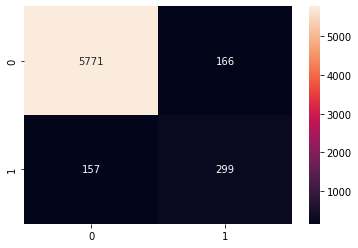

In [52]:
# PLOTTING A CONFUSION MATRIX

cm = confusion_matrix(test_y, preds)

sns.heatmap(cm, fmt='d', annot=True)

In [53]:
import pickle
pickle.dump(cv, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))